## Preprocessing

In [1]:
import pandas as pd
import numpy as np

games = pd.read_csv("games-features.csv", header = None, engine = 'python')

In [2]:
games.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,Name,ReleaseDate,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceFinal,SupportedLanguages
1,Counter-Strike,Nov 1 2000,0,88,68991,13033334,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99,English French German Italian Spanish Simplifi...
2,Team Fortress Classic,Apr 1 1999,0,0,2439,5399140,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99,English French German Italian Spanish
3,Day of Defeat,May 1 2003,0,79,2319,7621102,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99,English French German Italian Spanish
4,Deathmatch Classic,Jun 1 2001,0,0,888,7498965,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99,English French German Italian Spanish


In [3]:
# 把string的TRUE改為boolean的True
games = games.replace({'TRUE': True, 'FALSE': False})

In [4]:
# make first row the column name
games = games.rename(columns=games.iloc[0]).drop(games.index[0]).reset_index(drop=True)
games.head()

,Name,ReleaseDate,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceFinal,SupportedLanguages
0,Counter-Strike,Nov 1 2000,0,88,68991,13033334,False,False,False,True,...,False,False,False,False,False,False,False,False,9.99,English French German Italian Spanish Simplifi...
1,Team Fortress Classic,Apr 1 1999,0,0,2439,5399140,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
2,Day of Defeat,May 1 2003,0,79,2319,7621102,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
3,Deathmatch Classic,Jun 1 2001,0,0,888,7498965,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
4,Half-Life: Opposing Force,Nov 1 1999,0,0,2934,5399499,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Korean


In [5]:
# get release year from release date
ReleaseYear = []
for element in games['ReleaseDate']:
    ReleaseYear.append(element[-4:])

# insert new column ReleaseYear
games.insert(loc=2, column='ReleaseYear', value=ReleaseYear)
games.head()

,Name,ReleaseDate,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceFinal,SupportedLanguages
0,Counter-Strike,Nov 1 2000,2000,0,88,68991,13033334,False,False,False,...,False,False,False,False,False,False,False,False,9.99,English French German Italian Spanish Simplifi...
1,Team Fortress Classic,Apr 1 1999,1999,0,0,2439,5399140,False,False,False,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
2,Day of Defeat,May 1 2003,2003,0,79,2319,7621102,False,False,False,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
3,Deathmatch Classic,Jun 1 2001,2001,0,0,888,7498965,False,False,False,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
4,Half-Life: Opposing Force,Nov 1 1999,1999,0,0,2934,5399499,False,False,False,...,False,False,False,False,False,False,False,False,4.99,English French German Korean


In [6]:
# remove rows that doesn't match the year pattern
pattern = '[1-2][0-9][0-9][0-9]'
matches = games['ReleaseYear'].str.contains(pattern)

temp = games[matches]
temp = temp.reset_index()
temp = temp.drop('ReleaseDate', axis = 1)
temp = temp.drop('index', axis = 1)

In [7]:
temp.head()

,Name,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceFinal,SupportedLanguages
0,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,False,False,False,False,False,False,False,False,9.99,English French German Italian Spanish Simplifi...
1,Team Fortress Classic,1999,0,0,2439,5399140,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
2,Day of Defeat,2003,0,79,2319,7621102,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
3,Deathmatch Classic,2001,0,0,888,7498965,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
4,Half-Life: Opposing Force,1999,0,0,2934,5399499,False,False,False,True,...,False,False,False,False,False,False,False,False,4.99,English French German Korean


In [8]:
# add new column: numbers of supported languages
num_of_lang = []
for row in temp['SupportedLanguages']:
    num_of_lang.append(row.count(' ') + 1)
    
num_of_lang[:5]

[8, 5, 5, 5, 4]

In [9]:
temp['SupportedLanguagesCount'] = num_of_lang

In [10]:
columns = temp.drop('SupportedLanguages', axis=1).columns.tolist()
#['Name','ReleaseYear','RequiredAge',...,'GenreIsRacing','GenreIsMassivelyMultiplayer','PriceFinal']

In [11]:
# split the supported languages to multiple rows for encoding
games = temp.set_index(columns).apply(lambda x: x.str.split(' ').explode()).reset_index()
games.head()

,Name,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceFinal,SupportedLanguagesCount,SupportedLanguages
0,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,False,False,False,False,False,False,False,9.99,8,English
1,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,False,False,False,False,False,False,False,9.99,8,French
2,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,False,False,False,False,False,False,False,9.99,8,German
3,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,False,False,False,False,False,False,False,9.99,8,Italian
4,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,False,False,False,False,False,False,False,9.99,8,Spanish


In [12]:
# encode SupportedLanguages
games = pd.get_dummies(games , columns=['SupportedLanguages'])
games.head()

,Name,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,SupportedLanguages_Romanian,SupportedLanguages_Russian,SupportedLanguages_SimplifiedChinese,SupportedLanguages_Slovakian,SupportedLanguages_Spanish,SupportedLanguages_Swedish,SupportedLanguages_Thai,SupportedLanguages_TraditionalChinese,SupportedLanguages_Turkish,SupportedLanguages_Ukrainian
0,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
1,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
2,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
4,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# merge back all the rows that have the same Name feature
temp = games.groupby(['Name'], as_index=False, sort = False).max()

temp.head()

,Name,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,SupportedLanguages_Romanian,SupportedLanguages_Russian,SupportedLanguages_SimplifiedChinese,SupportedLanguages_Slovakian,SupportedLanguages_Spanish,SupportedLanguages_Swedish,SupportedLanguages_Thai,SupportedLanguages_TraditionalChinese,SupportedLanguages_Turkish,SupportedLanguages_Ukrainian
0,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,0,1,0,1,0,0,1,0,0
1,Team Fortress Classic,1999,0,0,2439,5399140,False,False,False,True,...,0,0,0,0,1,0,0,0,0,0
2,Day of Defeat,2003,0,79,2319,7621102,False,False,False,True,...,0,0,0,0,1,0,0,0,0,0
3,Deathmatch Classic,2001,0,0,888,7498965,False,False,False,True,...,0,0,0,0,1,0,0,0,0,0
4,Half-Life: Opposing Force,1999,0,0,2934,5399499,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0


In [14]:
temp[temp['Name'] == 'Assassins Creed(r) Brotherhood']

,Name,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,SupportedLanguages_Romanian,SupportedLanguages_Russian,SupportedLanguages_SimplifiedChinese,SupportedLanguages_Slovakian,SupportedLanguages_Spanish,SupportedLanguages_Swedish,SupportedLanguages_Thai,SupportedLanguages_TraditionalChinese,SupportedLanguages_Turkish,SupportedLanguages_Ukrainian
983,Assassins Creed(r) Brotherhood,2011,17,88,4337,872536,False,False,False,True,...,0,0,0,0,1,1,0,0,0,0


In [15]:
games = temp

## Using classification models & k-fold validation
- Decision Tree
- Random Forest
- KNN

### Data binning

In [16]:
# convert string to int
games['SteamSpyOwners'] = games['SteamSpyOwners'].astype(int)

# cut numeric feature 'SteamSpyOwners' to 5 bins 
games['bin'] = pd.qcut(games['SteamSpyOwners'], q=5, precision=1)

In [17]:
games

,Name,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,SupportedLanguages_Russian,SupportedLanguages_SimplifiedChinese,SupportedLanguages_Slovakian,SupportedLanguages_Spanish,SupportedLanguages_Swedish,SupportedLanguages_Thai,SupportedLanguages_TraditionalChinese,SupportedLanguages_Turkish,SupportedLanguages_Ukrainian,bin
0,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,1,0,1,0,0,1,0,0,"(136844.0, 90687580.0]"
1,Team Fortress Classic,1999,0,0,2439,5399140,False,False,False,True,...,0,0,0,1,0,0,0,0,0,"(136844.0, 90687580.0]"
2,Day of Defeat,2003,0,79,2319,7621102,False,False,False,True,...,0,0,0,1,0,0,0,0,0,"(136844.0, 90687580.0]"
3,Deathmatch Classic,2001,0,0,888,7498965,False,False,False,True,...,0,0,0,1,0,0,0,0,0,"(136844.0, 90687580.0]"
4,Half-Life: Opposing Force,1999,0,0,2934,5399499,False,False,False,True,...,0,0,0,0,0,0,0,0,0,"(136844.0, 90687580.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,Adventures of Hooi,2016,0,0,0,3766,False,False,False,True,...,0,0,0,0,0,0,0,0,0,"(3408.0, 11299.0]"
10002,Ludu,2016,0,0,0,1973,False,True,False,False,...,0,0,0,0,0,0,0,0,0,"(532.9, 3408.0]"
10003,Void Pyramid,2016,0,0,0,1076,False,True,False,False,...,0,0,0,0,0,0,0,0,0,"(532.9, 3408.0]"
10004,Russian Underground: VR,2016,0,0,0,1347,False,False,False,True,...,0,0,0,0,0,0,0,0,0,"(532.9, 3408.0]"


In [18]:
# show the 5 bins' range & numbers of each
games['bin'].value_counts().sort_index()

(532.9, 3408.0]           2035
(3408.0, 11299.0]         1981
(11299.0, 33000.0]        1994
(33000.0, 136844.0]       1998
(136844.0, 90687580.0]    1998
Name: bin, dtype: int64

In [19]:
# relabel the bin to a prettier label according to the range above
five_level= []

for binned_value in games['SteamSpyOwners']:
    if(binned_value < 3500):
        five_level.append('<3500')
    elif(binned_value < 11000):
        five_level.append('<11k')
    elif(binned_value < 33000):
        five_level.append('<33k')
    elif(binned_value < 140000):
        five_level.append('<140k')
    else:
        five_level.append('>140k')
        
five_level = pd.DataFrame(five_level)

games['five_level'] = five_level
games = games.drop(['bin'], axis = 1)

In [20]:
games

,Name,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,SteamSpyOwners,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,...,SupportedLanguages_Russian,SupportedLanguages_SimplifiedChinese,SupportedLanguages_Slovakian,SupportedLanguages_Spanish,SupportedLanguages_Swedish,SupportedLanguages_Thai,SupportedLanguages_TraditionalChinese,SupportedLanguages_Turkish,SupportedLanguages_Ukrainian,five_level
0,Counter-Strike,2000,0,88,68991,13033334,False,False,False,True,...,0,1,0,1,0,0,1,0,0,>140k
1,Team Fortress Classic,1999,0,0,2439,5399140,False,False,False,True,...,0,0,0,1,0,0,0,0,0,>140k
2,Day of Defeat,2003,0,79,2319,7621102,False,False,False,True,...,0,0,0,1,0,0,0,0,0,>140k
3,Deathmatch Classic,2001,0,0,888,7498965,False,False,False,True,...,0,0,0,1,0,0,0,0,0,>140k
4,Half-Life: Opposing Force,1999,0,0,2934,5399499,False,False,False,True,...,0,0,0,0,0,0,0,0,0,>140k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,Adventures of Hooi,2016,0,0,0,3766,False,False,False,True,...,0,0,0,0,0,0,0,0,0,<11k
10002,Ludu,2016,0,0,0,1973,False,True,False,False,...,0,0,0,0,0,0,0,0,0,<3500
10003,Void Pyramid,2016,0,0,0,1076,False,True,False,False,...,0,0,0,0,0,0,0,0,0,<3500
10004,Russian Underground: VR,2016,0,0,0,1347,False,False,False,True,...,0,0,0,0,0,0,0,0,0,<3500


### Data Visualization

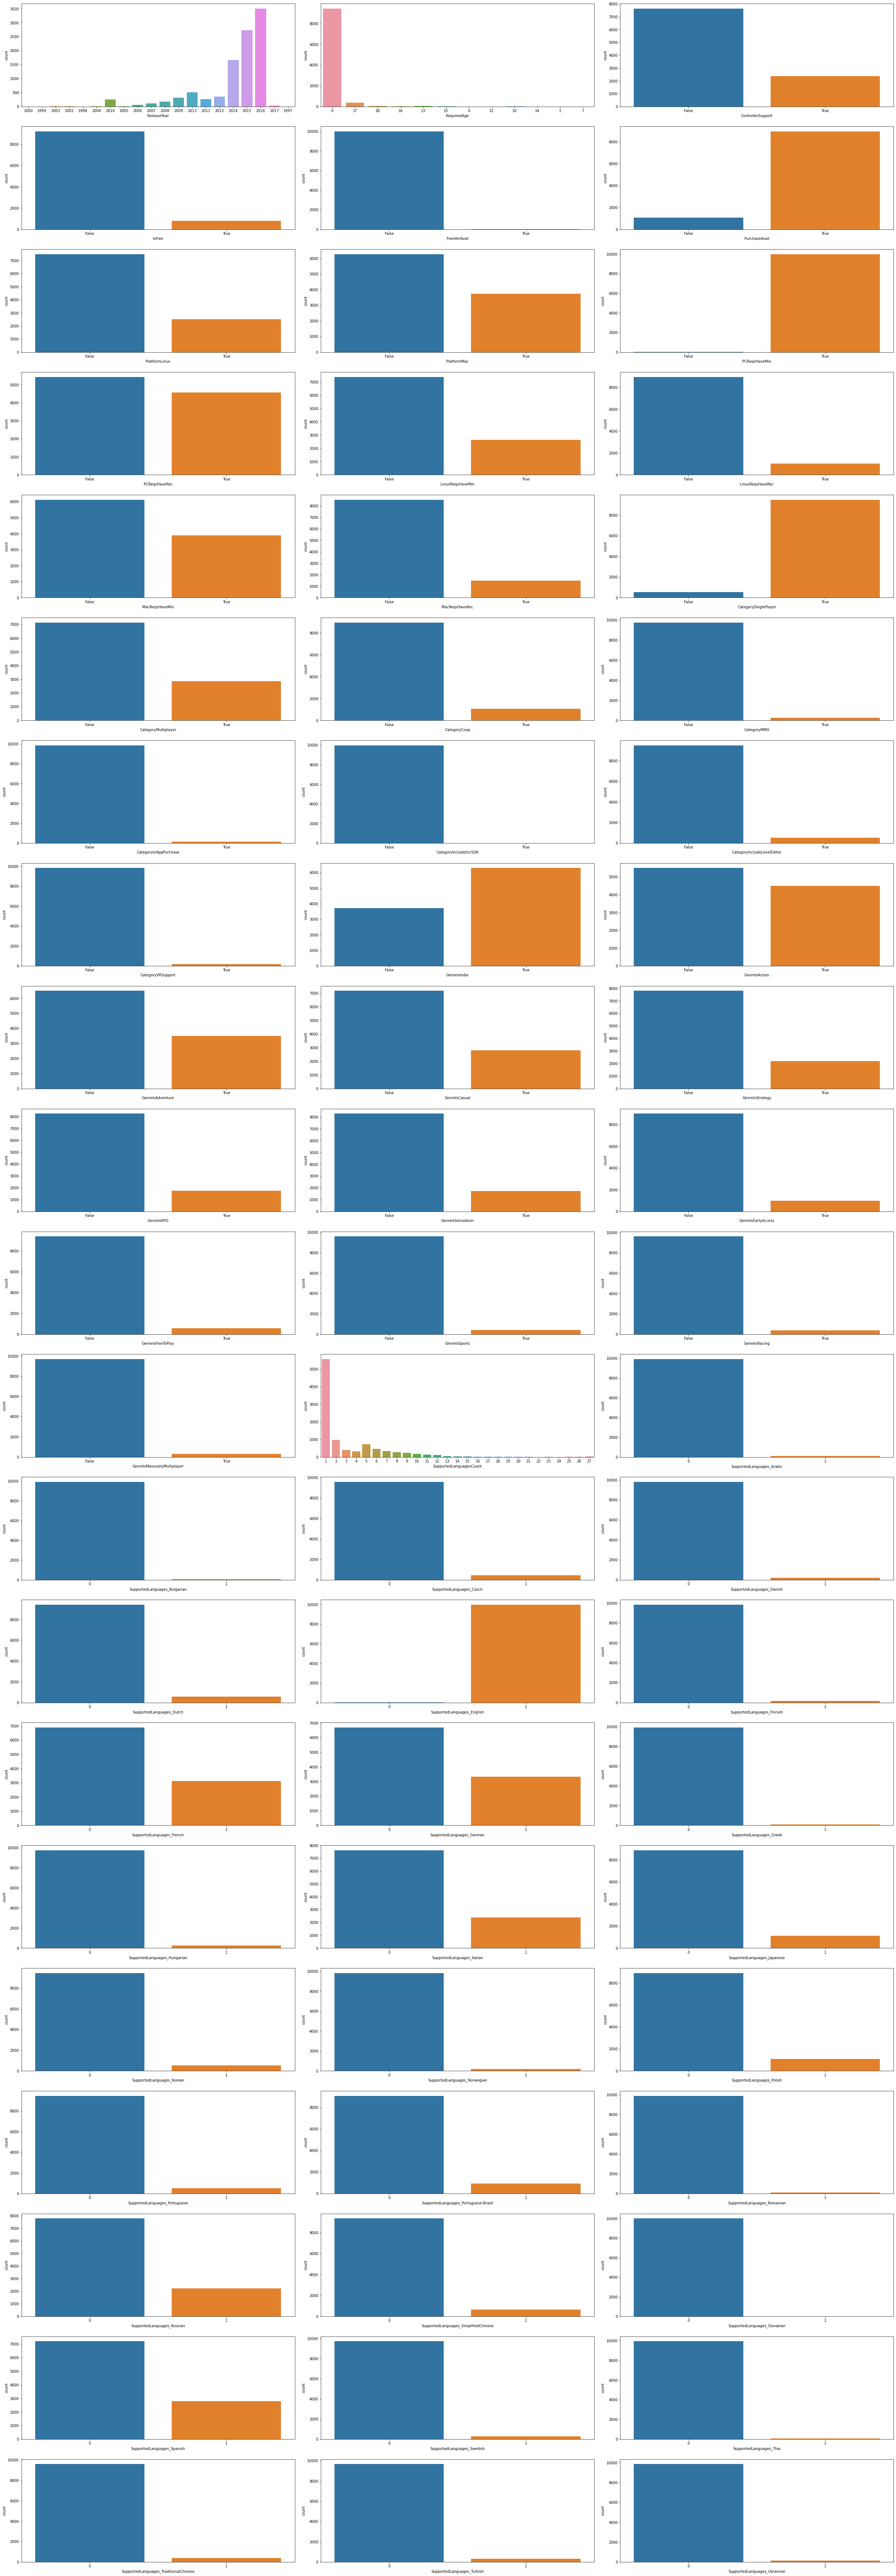

In [21]:
# draw the data distribution of different features
import seaborn as sns
from matplotlib import pyplot as plt

features = games.drop(['Name','five_level','Metacritic','RecommendationCount','SteamSpyOwners', 'PriceFinal'], axis=1).columns.tolist()

# draw subplots
fig, axes = plt.subplots(21, 3)
fig.set_figheight(100)
fig.set_figwidth(35)
#fig.suptitle('Data distribution of games', fontweight="bold", size=20)

count = 0

for feature in features:
    sns.countplot(ax=axes[int(count/3), count%3], x = games[feature])
    count+=1
#fig.delaxes(axes[7][1])
#fig.delaxes(axes[12][3])
#fig.delaxes(axes[12][4])
fig.tight_layout(pad=2)

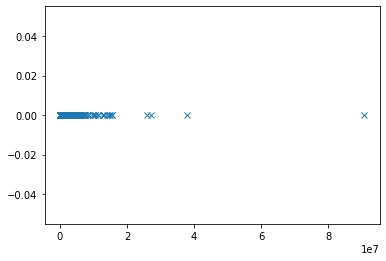

In [22]:
val = 0. 
ar = games['SteamSpyOwners']
plt.plot(ar, np.zeros_like(ar) + val, 'x')
plt.show()

### Building Models

In [23]:
from sklearn import tree

DecisionTreeNPCA_model=tree.DecisionTreeClassifier(max_depth = 10)

In [24]:
X = games.drop(['Name','five_level', 'SteamSpyOwners', 'five_level'], axis = 1)
five_level_y = games['five_level']

X.head()

,ReleaseYear,RequiredAge,Metacritic,RecommendationCount,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,PlatformLinux,PlatformMac,...,SupportedLanguages_Romanian,SupportedLanguages_Russian,SupportedLanguages_SimplifiedChinese,SupportedLanguages_Slovakian,SupportedLanguages_Spanish,SupportedLanguages_Swedish,SupportedLanguages_Thai,SupportedLanguages_TraditionalChinese,SupportedLanguages_Turkish,SupportedLanguages_Ukrainian
0,2000,0,88,68991,False,False,False,True,True,True,...,0,0,1,0,1,0,0,1,0,0
1,1999,0,0,2439,False,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0
2,2003,0,79,2319,False,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0
3,2001,0,0,888,False,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0
4,1999,0,0,2934,False,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0


In [25]:
five_level_y

0        >140k
1        >140k
2        >140k
3        >140k
4        >140k
         ...  
10001     <11k
10002    <3500
10003    <3500
10004    <3500
10005    <3500
Name: five_level, Length: 10006, dtype: object

In [26]:
import statistics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics._classification import accuracy_score
from sklearn.metrics._classification import recall_score
from sklearn.metrics._classification import precision_score
from tabulate import tabulate

folds = StratifiedKFold(n_splits=3)

five_level_label = ['<3500', '<11k', '<33k', '<140k', '>140k']

accscores = []
recscores = []
prescores = []

cm_holder = []

for train_index, test_index in folds.split(X,five_level_y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       five_level_y.iloc[train_index], five_level_y.iloc[test_index]
    # test model
    DecisionTreeNPCA_model.fit(X_train, y_train)
    y_predict = DecisionTreeNPCA_model.predict(X_test)
    cm_holder.append(confusion_matrix(y_test, y_predict, labels = five_level_label))
    accscores.append(accuracy_score(y_test, y_predict))  
    recscores.append(recall_score(y_test, y_predict, average='macro'))  
    prescores.append(precision_score(y_test, y_predict, average='macro'))


In [27]:
# results: confusion matrix
ma = sum(cm_holder)/3

# results: accuracy
accuracy = statistics.mean(accscores)

# results: sensitivity(recall)
recall = statistics.mean(recscores)

# results: precision
precision = statistics.mean(prescores)

# draw table with accuracy, recall, precision
data = [[accuracy, recall, precision]]

### PCA

In [28]:
DecisionTreePCA_model=tree.DecisionTreeClassifier(max_depth = 10)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

folds = StratifiedKFold(n_splits=3)

accscores2 = []
recscores2 = []
prescores2 = []

cm_holder2 = []

scaler2 = StandardScaler()

for train_index, test_index in folds.split(X,five_level_y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       five_level_y.iloc[train_index], five_level_y.iloc[test_index]
    # Fit on training set only.
    scaler2.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler2.transform(X_train)
    X_test = scaler2.transform(X_test)
    
    # Make an instance of the Model
    pca=PCA(n_components='mle')
    
    # fitting PCA on the training set only.
    pca.fit(X_train)

    # dimensional reduction
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    # test model
    DecisionTreePCA_model.fit(X_train, y_train)
    y_predict = DecisionTreePCA_model.predict(X_test)
    cm_holder2.append(confusion_matrix(y_test, y_predict, labels = five_level_label))
    accscores2.append(accuracy_score(y_test, y_predict))  
    recscores2.append(recall_score(y_test, y_predict, average='macro'))  
    prescores2.append(precision_score(y_test, y_predict, average='macro'))


In [30]:
# results: confusion matrix
ma2 = sum(cm_holder2)/3

# results: accuracy
accuracy2 = statistics.mean(accscores2)

# results: sensitivity(recall)
recall2 = statistics.mean(recscores2)

# results: precision
precision2 = statistics.mean(prescores2)

# draw table with accuracy, recall, precision
data2 = [[accuracy2, recall2, precision2]]

In [31]:
# save decision tree pic
fig = plt.figure(figsize=(350,250))
_ = tree.plot_tree(DecisionTreeNPCA_model, 
                   feature_names=X.columns,  
                   class_names=five_level_label,
                   filled=True, 
                   fontsize = 30, 
                   impurity = False, 
                   label = 'none')
fig.savefig('decisiontree.png', bbox_inches='tight')
plt.close(fig)

## Random Forest

In [32]:
from sklearn import ensemble

RandomForestNPCA100_model=ensemble.RandomForestClassifier(n_estimators = 100)

In [33]:
folds = StratifiedKFold(n_splits=3)

accscores3 = []
recscores3 = []
prescores3 = []
cm_holder3 = []

for train_index, test_index in folds.split(X,five_level_y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       five_level_y.iloc[train_index], five_level_y.iloc[test_index]
    # test model  
    RandomForestNPCA100_model.fit(X_train, y_train)
    y_predict = RandomForestNPCA100_model.predict(X_test)
    cm_holder3.append(confusion_matrix(y_test, y_predict, labels = five_level_label))
    accscores3.append(accuracy_score(y_test, y_predict))  
    recscores3.append(recall_score(y_test, y_predict, average='macro'))  
    prescores3.append(precision_score(y_test, y_predict, average='macro'))
    

In [34]:
# results: confusion matrix
ma3 = sum(cm_holder3)/3

# results: accuracy
accuracy3 = statistics.mean(accscores3)

# results: sensitivity(recall)
recall3 = statistics.mean(recscores3)

# results: precision
precision3 = statistics.mean(prescores3)

# draw table with accuracy, recall, precision
data3 = [[accuracy3, recall3, precision3]]

### PCA

In [35]:
RandomForestPCA100_model=ensemble.RandomForestClassifier(n_estimators = 100)

In [36]:
folds = StratifiedKFold(n_splits=3)

accscores4 = []
recscores4 = []
prescores4 = []
cm_holder4 = []

scaler4 = StandardScaler()

for train_index, test_index in folds.split(X,five_level_y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       five_level_y.iloc[train_index], five_level_y.iloc[test_index]
    
    # Fit on training set only.
    scaler4.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler4.transform(X_train)
    X_test = scaler4.transform(X_test)
    
    # Make an instance of the Model
    pca=PCA(n_components='mle')
    
    # fitting PCA on the training set only.
    pca.fit(X_train)

    # dimensional reduction
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    # test model
    RandomForestPCA100_model.fit(X_train, y_train)
    y_predict = RandomForestPCA100_model.predict(X_test)
    cm_holder4.append(confusion_matrix(y_test, y_predict, labels = five_level_label))
    accscores4.append(accuracy_score(y_test, y_predict))  
    recscores4.append(recall_score(y_test, y_predict, average='macro'))  
    prescores4.append(precision_score(y_test, y_predict, average='macro'))
    

In [37]:
# results: confusion matrix
ma4 = sum(cm_holder4)/3

# results: accuracy
accuracy4 = statistics.mean(accscores4)

# results: sensitivity(recall)
recall4 = statistics.mean(recscores4)

# results: precision
precision4 = statistics.mean(prescores4)

# draw table with accuracy, recall, precision
data4 = [[accuracy4, recall4, precision4]]

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

KNNNPCA15_model = KNeighborsClassifier(n_neighbors=15)

In [39]:
folds = StratifiedKFold(n_splits=3)

accscores11 = []
recscores11 = []
prescores11 = []
cm_holder11 = []

for train_index, test_index in folds.split(X,five_level_y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       five_level_y.iloc[train_index], five_level_y.iloc[test_index]
    # test model   
    
    KNNNPCA15_model.fit(X_train, y_train)
    y_predict = KNNNPCA15_model.predict(X_test)
    cm_holder11.append(confusion_matrix(y_test, y_predict, labels = five_level_label))
    accscores11.append(accuracy_score(y_test, y_predict))  
    recscores11.append(recall_score(y_test, y_predict, average='macro'))  
    prescores11.append(precision_score(y_test, y_predict, average='macro'))
    

In [40]:
# results: confusion matrix
ma11 = sum(cm_holder11)/3

# results: accuracy
accuracy11 = statistics.mean(accscores11)

# results: sensitivity(recall)
recall11 = statistics.mean(recscores11)

# results: precision
precision11 = statistics.mean(prescores11)

# draw table with accuracy, recall, precision
data11 = [[accuracy11, recall11, precision11]]

### PCA

In [41]:
KNNPCA15_model = KNeighborsClassifier(n_neighbors=15)

In [42]:
folds = StratifiedKFold(n_splits=3)

accscores12 = []
recscores12 = []
prescores12 = []
cm_holder12 = []

scaler12 = StandardScaler()

for train_index, test_index in folds.split(X,five_level_y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       five_level_y.iloc[train_index], five_level_y.iloc[test_index]
    
    # Fit on training set only.
    scaler12.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler12.transform(X_train)
    X_test = scaler12.transform(X_test)
    
    # Make an instance of the Model
    pca=PCA(n_components='mle')
    
    # fitting PCA on the training set only.
    pca.fit(X_train)

    # dimensional reduction
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    # test model       
    KNNPCA15_model.fit(X_train, y_train)
    y_predict = KNNPCA15_model.predict(X_test)
    cm_holder12.append(confusion_matrix(y_test, y_predict, labels = five_level_label))
    accscores12.append(accuracy_score(y_test, y_predict))  
    recscores12.append(recall_score(y_test, y_predict, average='macro'))  
    prescores12.append(precision_score(y_test, y_predict, average='macro'))
    

In [43]:
# results: confusion matrix
ma12 = sum(cm_holder12)/3

# results: accuracy
accuracy12 = statistics.mean(accscores11)

# results: sensitivity(recall)
recall12 = statistics.mean(recscores11)

# results: precision
precision12 = statistics.mean(prescores11)

# draw table with accuracy, recall, precision
data12 = [[accuracy12, recall12, precision12]]

In [44]:
from prettytable import PrettyTable

table = PrettyTable()

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

table.title = color.BOLD +'Decision tree with/without PCA for binary classification'+color.END
table.field_names = ['',color.BOLD +color.GREEN+'without PCA', 'with PCA' + color.END + color.END]
table.add_row([color.BOLD +color.BLUE+'accuracy'+color.END+color.END, accuracy, accuracy2])
table.add_row([color.BOLD +color.BLUE+'recall'+color.END+color.END, recall, recall2])
table.add_row([color.BOLD +color.BLUE+'precision'+color.END+color.END, precision, precision2])

print(table)

table.clear_rows()
table.title = color.BOLD +'Random forest with/without PCA for binary classification'+color.END
table.add_row([color.BOLD +color.BLUE+'accuracy'+color.END+color.END, accuracy3, accuracy4])
table.add_row([color.BOLD +color.BLUE+'recall'+color.END+color.END, recall3, recall4])
table.add_row([color.BOLD +color.BLUE+'precision'+color.END+color.END, precision3, precision4])

print(table)

table.clear_rows()
table.title = color.BOLD +'KNN with/without PCA for binary classification'+color.END
table.add_row([color.BOLD +color.BLUE+'accuracy'+color.END+color.END, accuracy11, accuracy12])
table.add_row([color.BOLD +color.BLUE+'recall'+color.END+color.END, recall11, recall12])
table.add_row([color.BOLD +color.BLUE+'precision'+color.END+color.END, precision11, precision12])

print(table)

+-------------------------------------------------------------------+
|      Decision tree with/without PCA for binary classification     |
+--------------+-------------------------+--------------------------+
|              |       without PCA       |         with PCA         |
+--------------+-------------------------+--------------------------+
|   accuracy   |    0.4235497958454825   |    0.3150094317349718    |
|    recall    |    0.4226995675199507   |   0.31489889086909356    |
|  precision   |    0.437980495556754    |   0.33314840828454617    |
+--------------+-------------------------+--------------------------+
+-------------------------------------------------------------------+
|      Random forest with/without PCA for binary classification     |
+--------------+--------------------------+-------------------------+
|              |       without PCA        |         with PCA        |
+--------------+--------------------------+-------------------------+
|   accuracy   |   0

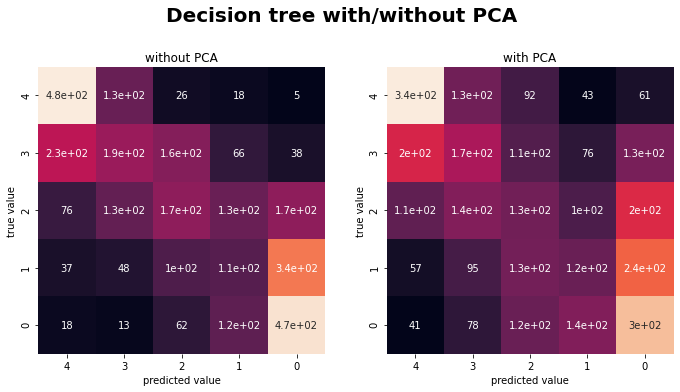

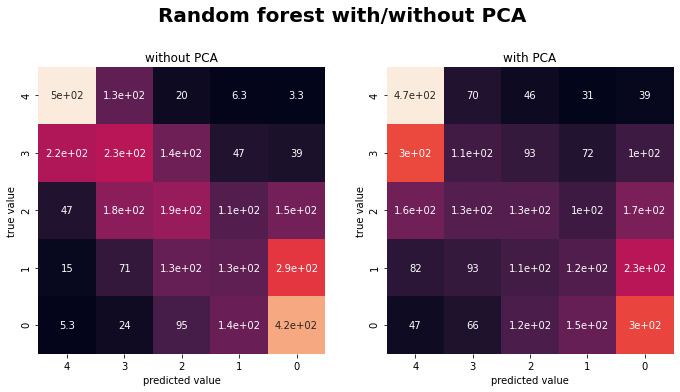

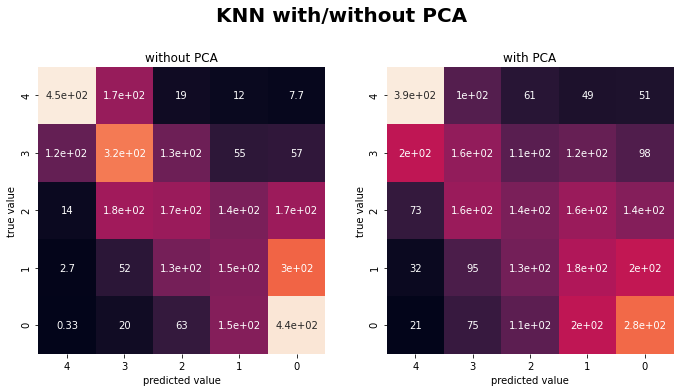

In [45]:
# Build subplot
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Decision tree with/without PCA', fontweight="bold", size=20)

sns.heatmap(ma,square= True, annot=True, cbar= False, ax = axes[0][0])
axes[0, 0].set_title('without PCA')
axes[0, 0].invert_xaxis()
axes[0, 0].invert_yaxis()


sns.heatmap(ma2,square= True, annot=True, cbar= False, ax = axes[0][1])
axes[0, 1].set_title('with PCA')
axes[0, 1].invert_xaxis()
axes[0, 1].invert_yaxis()

# name x and y axis
plt.setp(axes[:, :], xlabel='predicted value')
plt.setp(axes[:, :], ylabel='true value')

# delete extra plot
fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])

# print out the subplot
plt.tight_layout(pad=2)


# Build subplot
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Random forest with/without PCA', fontweight="bold", size=20)

sns.heatmap(ma3,square= True, annot=True, cbar= False, ax = axes[0][0])
axes[0, 0].set_title('without PCA')
axes[0, 0].invert_xaxis()
axes[0, 0].invert_yaxis()


sns.heatmap(ma4,square= True, annot=True, cbar= False, ax = axes[0][1])
axes[0, 1].set_title('with PCA')
axes[0, 1].invert_xaxis()
axes[0, 1].invert_yaxis()

# name x and y axis
plt.setp(axes[:, :], xlabel='predicted value')
plt.setp(axes[:, :], ylabel='true value')

# delete extra plot
fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])

# print out the subplot
plt.tight_layout(pad=2)

# Build subplot
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('KNN with/without PCA', fontweight="bold", size=20)

sns.heatmap(ma11,square= True, annot=True, cbar= False, ax = axes[0][0])
axes[0, 0].set_title('without PCA')
axes[0, 0].invert_xaxis()
axes[0, 0].invert_yaxis()


sns.heatmap(ma12,square= True, annot=True, cbar= False, ax = axes[0][1])
axes[0, 1].set_title('with PCA')
axes[0, 1].invert_xaxis()
axes[0, 1].invert_yaxis()

# name x and y axis
plt.setp(axes[:, :], xlabel='predicted value')
plt.setp(axes[:, :], ylabel='true value')

# delete extra plot
fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])

# print out the subplot
plt.tight_layout(pad=2)

## Artificial Neural Networks w/ holdout validation

In [46]:
from sklearn.model_selection import train_test_split

train_class = five_level_y
train_features = X

X_train,X_test,y_train,y_test=train_test_split(train_features,train_class,test_size=0.3)

In [47]:
# import lib
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn import preprocessing

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()

# Add Input layer hidden layer with 128 neuros
model.add(Dense(units=128, activation='sigmoid')) 

model.add(Dense(64, activation='sigmoid'))

model.add(Dense(32, activation='sigmoid'))


# Add output layer
model.add(Dense(units=5, activation='softmax'))

# compile and choose the loss, optimizer, and validation method
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  

# encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)  

# train
model.fit(X_train, y_train, epochs=40)#, callbacks=[tensorboard])

Epoch 1/40
219/219 [==============================] - 1s 1ms/step - loss: 1.5235 - accuracy: 0.3060
Epoch 2/40
219/219 [==============================] - 0s 1ms/step - loss: 1.3412 - accuracy: 0.4001
Epoch 3/40
219/219 [==============================] - 0s 1ms/step - loss: 1.2964 - accuracy: 0.4238
Epoch 4/40
219/219 [==============================] - 0s 1ms/step - loss: 1.2672 - accuracy: 0.4425
Epoch 5/40
219/219 [==============================] - 0s 1ms/step - loss: 1.2479 - accuracy: 0.4539
Epoch 6/40
219/219 [==============================] - 0s 2ms/step - loss: 1.2301 - accuracy: 0.4610
Epoch 7/40
219/219 [==============================] - 0s 1ms/step - loss: 1.2190 - accuracy: 0.4625
Epoch 8/40
219/219 [==============================] - 0s 1ms/step - loss: 1.2077 - accuracy: 0.4669
Epoch 9/40
219/219 [==============================] - 0s 1ms/step - loss: 1.1934 - accuracy: 0.4697
Epoch 10/40
219/219 [==============================] - 0s 1ms/step - loss: 1.1804 - accuracy: 0.4769

In [48]:
list(le.classes_)

['<11k', '<140k', '<33k', '<3500', '>140k']

+------------+----------+-------------+
|   accuracy |   recall |   precision |
+============+==========+=============+
|   0.523984 | 0.526497 |    0.528842 |
+------------+----------+-------------+


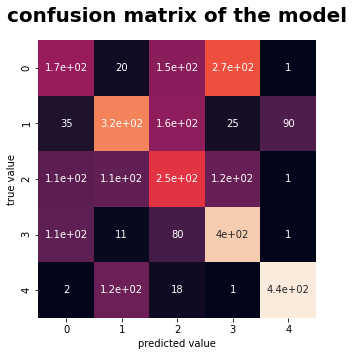

In [49]:
y_predict = np.argmax(model.predict(X_test), axis=-1)

# results: confusion matrix
plt.figure(figsize=(16,5))
plt.suptitle('confusion matrix of the model', fontweight="bold", size=20)

mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat,square= True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")
#plt.show()
plt.tight_layout()

# results: accuracy
accuracy = accuracy_score(y_test, y_predict)

# results: sensitivity(recall)
recall = recall_score(y_test, y_predict, average='macro')

# results: precision
precision = precision_score(y_test, y_predict, average='macro')

# draw table with accuracy, recall, precision
data = [[accuracy, recall, precision]]

headers = ["accuracy", "recall", "precision"]

print(tabulate(data, headers= headers, tablefmt= "grid"))

## Using regression model
- Linear regression

In [50]:
y = games['SteamSpyOwners']

In [51]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = regr.predict(X)

print('r2 score:', r2_score(y, y_pred)) 
print('mean_absolute_error:', mean_absolute_error(y, y_pred))

r2 score: 0.49391735839214657
mean_absolute_error: 234138.71007704406


## Conclusion & Application

In [53]:
test = (games[games['Name'] == 'Assassins Creed(r) Brotherhood'])
modified_test = test.drop(['Name', 'five_level', 'SteamSpyOwners'], axis = 1)
modified_test['PlatformLinux'] = True
a = regr.predict(modified_test)
print(a - test['SteamSpyOwners'].values[0])

[165824.31517708]


In [54]:
ind = np.argsort(-DecisionTreeNPCA_model.feature_importances_)[:10]
print('top 10 important features in determining the class............')
print(DecisionTreeNPCA_model.feature_names_in_[ind])

top 10 important features in determining the class............
['RecommendationCount' 'ReleaseYear' 'PriceFinal' 'Metacritic'
 'SupportedLanguagesCount' 'IsFree' 'GenreIsEarlyAccess' 'GenreIsRPG'
 'PlatformMac' 'PCReqsHaveRec']
